>># **PROJET : Anticipez les besoins en consommation de batiments**

>>>Source du jeu de données : 	https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download

>>>>>># **TRAITEE PROJET :**


># **Importation de librairies**

Importons dans un premier temps l'ensemble des librairies qui vont nous servir tout au long de l'étude :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

Reglages de quelques paramètres

In [ ]:
#Formatons les colonnes en faisant en sorte que tous les décimaux soit affichés avec 3 chiffres après la virgule
pd.set_option('display.float_format', '{:.3f}'.format)

# Change les parametre de panda pour afficher toutes colonnes
pd.set_option('display.max_columns', None)

# **Exploration des données**

In [ ]:
df_for_essais = pd.read_csv('df_for_essais.csv')

>## **Aperçu des données**

In [ ]:
df_for_essais.head()

,Identifiant_commande,Identifiant_client,Statut_commande,Horodatage_achat_annee,Horodatage_achat_mois,Horodatage_achat_mois_nom,Horodatage_achat_annee_mois,Horodatage_achat_jour,date_Horodatage_achat,Horodatage_achat_dayofweek,Horodatage_achat_dayofweek_nom,Horodatage_achat_heure,Horodatage_achat_time_day,Date_achat,Heure_achat,Date_validation,Heure_validation,Date_livraison_transporteur,Heure_livraison_transporteur,Date_livraison_client,Heure_livraison_client,Date_livraison_estimee,Heure_livraison_estimee,classification_horodatage_achat,Identifiant_article_commande,Identifiant_produit,Identifiant_vendeur,Prix,Frais_de_port,Date_limite_livraison,Heure_livraison_livraison,Identifiant_commentaire,Score_commentaire,Titre_commentaire,Message_commentaire,Date_creation_commentaire,Heure_creation_commentaire,Date_réponse_commentaire,Heure_réponse_commentaire
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,10,Oct,2017 10,2,2017 10 2,1,Mon,10,AM,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00,Matin,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.990,8.720,2017-10-06,11:07:15,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,00:00:00,2017-10-12,03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018,7,Jul,2018 07,24,2018 7 24,2,Tue,20,PM,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00,soir,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.700,22.760,2018-07-30,03:24:27,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,00:00:00,2018-08-08,18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018,8,Aug,2018 08,8,2018 8 8,3,Wed,8,AM,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00,Matin,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.900,19.220,2018-08-13,08:55:23,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,00:00:00,2018-08-22,19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017,11,Nov,2017 11,18,2017 11 18,6,Sat,19,PM,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00,soir,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.000,27.200,2017-11-23,19:45:59,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,00:00:00,2017-12-05,19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018,2,Feb,2018 02,13,2018 2 13,2,Tue,21,PM,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00,nuit,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.900,8.720,2018-02-19,20:31:37,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,00:00:00,2018-02-18,13:02:51


In [ ]:
df_for_essais.columns

Index(['Identifiant_commande', 'Identifiant_client', 'Statut_commande',
       'Horodatage_achat_annee', 'Horodatage_achat_mois',
       'Horodatage_achat_mois_nom', 'Horodatage_achat_annee_mois',
       'Horodatage_achat_jour', 'date_Horodatage_achat',
       'Horodatage_achat_dayofweek', 'Horodatage_achat_dayofweek_nom',
       'Horodatage_achat_heure', 'Horodatage_achat_time_day', 'Date_achat',
       'Heure_achat', 'Date_validation', 'Heure_validation',
       'Date_livraison_transporteur', 'Heure_livraison_transporteur',
       'Date_livraison_client', 'Heure_livraison_client',
       'Date_livraison_estimee', 'Heure_livraison_estimee',
       'classification_horodatage_achat', 'Identifiant_article_commande',
       'Identifiant_produit', 'Identifiant_vendeur', 'Prix', 'Frais_de_port',
       'Date_limite_livraison', 'Heure_livraison_livraison',
       'Identifiant_commentaire', 'Score_commentaire', 'Titre_commentaire',
       'Message_commentaire', 'Date_creation_commentaire',
  

# **Quelle fréquence nécessaire de mise à jour du modèle de segmentation ?**

In [ ]:
data_test = df_for_essais[['Identifiant_client', 'Identifiant_commande', 'Prix', 'Score_commentaire', 'Date_achat']]
data_test.head()

,Identifiant_client,Identifiant_commande,Prix,Score_commentaire,Date_achat
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,29.990,4,2017-10-02
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,118.700,4,2018-07-24
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,159.900,5,2018-08-08
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,45.000,5,2017-11-18
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,19.900,5,2018-02-13


In [ ]:
data_test[['Identifiant_client', 'Date_achat']].reset_index()

,index,Identifiant_client,Date_achat
0,0,9ef432eb6251297304e76186b10a928d,2017-10-02
1,1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24
2,2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08
3,3,f88197465ea7920adcdbec7375364d82,2017-11-18
4,4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13
...,...,...,...
112367,112367,1fca14ff2861355f6e5f14306ff977a7,2018-02-06
112368,112368,1aa71eb042121263aafbe80c1b562c9c,2017-08-27
112369,112369,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08
112370,112370,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08


In [ ]:
dates_commandes = data_test['Date_achat']
dates_commandes.head()

0    2017-10-02
1    2018-07-24
2    2018-08-08
3    2017-11-18
4    2018-02-13
Name: Date_achat, dtype: object

In [ ]:
data_test[['Identifiant_client', 'Date_achat']].min()

Identifiant_client    00012a2ce6f8dcda20d059ce98491703
Date_achat                                  2016-09-04
dtype: object

In [ ]:
date_1ere_cmd = data_test['Date_achat'].min()
print('La date à laquelle la première commande fut faite :', date_1ere_cmd)

La date à laquelle la première commande fut faite : 2016-09-04


In [ ]:
data_test[['Identifiant_client', 'Date_achat']].max()

Identifiant_client    ffffa3172527f765de70084a7e53aae8
Date_achat                                  2018-09-03
dtype: object

In [ ]:
date_derniere_cmd = data_test['Date_achat'].max()
print('La date à laquelle la commande la plus recente fut faite :', date_derniere_cmd)

La date à laquelle la commande la plus recente fut faite : 2018-09-03


In [ ]:
data_test[data_test['Date_achat'] <= '2017-09-04'].groupby('Identifiant_client').size()

Identifiant_client
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
0004164d20a9e969af783496f3408652    1
00062b33cb9f6fe976afdcff967ea74d    1
                                   ..
fff1da51c6d3b52986925d7bcd8a6d30    1
fff200ad56bd3e1caa576cce9d282672    1
fff25ab9d3c9ba6ad8119576f285a3d9    1
fff4f0c85a4d710abe06599e1ed08a42    1
ffffa3172527f765de70084a7e53aae8    2
Length: 23350, dtype: int64

In [ ]:
df_client_annee_1 = data_test.loc[data_test['Date_achat'] <= '2017-09-04']
display(df_client_annee_1.sort_values(by='Date_achat', ascending=False))
print('\n')
print('Nombre de client durant la première d\'exercice :', df_client_annee_1.shape[0])

,Identifiant_client,Identifiant_commande,Prix,Score_commentaire,Date_achat
69866,c9869e8666697b9bd971ae4910f37ce6,e22decac5ed99a0335532a753f62e935,149.900,3,2017-09-04
13698,b2e007cf7c50903380e2bda1c32ec398,6fbe92e0f9d5a728e3fd2be036b5ab05,210.000,1,2017-09-04
71970,e3e730f17d35e6e0e2595e5cfbee89eb,e1458d8518d1632318cd88ead53c633a,45.900,4,2017-09-04
24752,3619df7a89a873ba249bf47e9fc6ed2c,41a207671f292d00ffea01b171f2a30b,39.000,5,2017-09-04
88834,1935a24e84786e81a8f932f18ce7af50,24b41566e32a4a737536859707517572,69.900,5,2017-09-04
...,...,...,...,...,...
34754,86dc2ffce2dfff336de2f386a786e574,bfbd0f9bdef84302105ad712db648a6c,44.990,1,2016-09-15
34755,86dc2ffce2dfff336de2f386a786e574,bfbd0f9bdef84302105ad712db648a6c,44.990,1,2016-09-15
4918,683c54fc24d40ee9f8a6fc179fd9856c,e5fa5a7210941f7d56d0208e4e071d35,59.500,1,2016-09-05
5078,08c5351a6aca1c1589a38f244edeee9d,2e7a8482f6fb09756ca50c10d7bfc047,39.990,1,2016-09-04




Nombre de client durant la première d'exercice : 26713


In [ ]:
end_date = '2017-09-04'
end_date

'2017-09-04'

In [ ]:
def make_rfm_table(df_client_annee_1, end_date, data_ref = None):

    # Calcul de la date de référence pour le calcul de la récence
    reference_date = pd.to_datetime(end_date)

    df_client_annee_1 = df_client_annee_1.copy()  # Créer une copie du DataFrame pour éviter les avertissements

    df_client_annee_1['Recence'] = (reference_date - pd.to_datetime(df_client_annee_1['Date_achat'])).dt.days
    df_client_annee_1['Frequence'] = df_client_annee_1.groupby('Identifiant_client')['Identifiant_commande'].transform('count')
    df_client_annee_1['Monetaire'] = df_client_annee_1.groupby('Identifiant_client')['Prix'].transform('sum')
    df_client_annee_1['Score_commentaire'] = df_client_annee_1['Score_commentaire'].fillna(0)

    if data_ref is not None :
      df_client_annee_1 = df_client_annee_1[df_client_annee_1['Identifiant_client'].isin(data_ref['Identifiant_client'])]
      df_client_annee_1 = df_client_annee_1.sort_values(by='Identifiant_client', ascending=True)

    else :
      # Tri du DataFrame par une colonne spécifique, par exemple 'Recence' en ordre décroissant
      df_client_annee_1 = df_client_annee_1.sort_values(by='Identifiant_client', ascending=True)


    return df_client_annee_1[['Identifiant_client', 'Recence', 'Frequence', 'Monetaire', 'Score_commentaire']].copy()

rfm_table = make_rfm_table(df_client_annee_1, end_date)


In [ ]:
rfm_table

,Identifiant_client,Recence,Frequence,Monetaire,Score_commentaire
11269,000161a058600d5901f007fab4c27140,50,1,54.900,4
74408,0001fd6190edaaf884bcaf3d49edf079,188,1,179.990,5
48756,0002414f95344307404f0ace7a26f1d5,19,1,149.900,5
83179,0004164d20a9e969af783496f3408652,145,1,59.990,1
99906,00062b33cb9f6fe976afdcff967ea74d,173,1,47.990,3
...,...,...,...,...,...
86146,fff200ad56bd3e1caa576cce9d282672,204,1,92.900,4
46696,fff25ab9d3c9ba6ad8119576f285a3d9,123,1,199.000,5
107020,fff4f0c85a4d710abe06599e1ed08a42,163,1,75.000,5
83454,ffffa3172527f765de70084a7e53aae8,2,2,21.800,5


In [ ]:
def perform_clustering(rfm_table, end_date, scaler=None):
    if scaler is None :
      scaler = StandardScaler()
      rfm_table[['Recence_std', 'Frequence_std', 'Monetaire_std', 'Score_commentaire_std']] = scaler.fit_transform(rfm_table[['Recence', 'Frequence', 'Monetaire', 'Score_commentaire']])
      rfm_table_std = rfm_table[['Recence_std', 'Frequence_std', 'Monetaire_std', 'Score_commentaire_std']]

    else :
      rfm_table[['Recence_std', 'Frequence_std', 'Monetaire_std', 'Score_commentaire_std']] = scaler.transform(rfm_table[['Recence', 'Frequence', 'Monetaire', 'Score_commentaire']])
      rfm_table_std = rfm_table[['Recence_std', 'Frequence_std', 'Monetaire_std', 'Score_commentaire_std']]

    kmeans = KMeans(n_clusters=2,  n_init=50, init='random')
    kmeans.fit(rfm_table_std)
    predictions = kmeans.predict(rfm_table_std)
    rfm_table['Predictions'] = predictions

    return rfm_table, kmeans, scaler

ref_table, kmeans, scaler = perform_clustering(rfm_table, end_date)


In [ ]:
ref_table

,Identifiant_client,Recence,Frequence,Monetaire,Score_commentaire,Recence_std,Frequence_std,Monetaire_std,Score_commentaire_std,Predictions
11269,000161a058600d5901f007fab4c27140,50,1,54.900,4,-0.733,-0.355,-0.415,-0.089,1
74408,0001fd6190edaaf884bcaf3d49edf079,188,1,179.990,5,1.258,-0.355,0.127,0.672,1
48756,0002414f95344307404f0ace7a26f1d5,19,1,149.900,5,-1.180,-0.355,-0.004,0.672,1
83179,0004164d20a9e969af783496f3408652,145,1,59.990,1,0.638,-0.355,-0.393,-2.371,0
99906,00062b33cb9f6fe976afdcff967ea74d,173,1,47.990,3,1.042,-0.355,-0.445,-0.849,0
...,...,...,...,...,...,...,...,...,...,...
86146,fff200ad56bd3e1caa576cce9d282672,204,1,92.900,4,1.489,-0.355,-0.251,-0.089,1
46696,fff25ab9d3c9ba6ad8119576f285a3d9,123,1,199.000,5,0.320,-0.355,0.209,0.672,1
107020,fff4f0c85a4d710abe06599e1ed08a42,163,1,75.000,5,0.898,-0.355,-0.328,0.672,1
83454,ffffa3172527f765de70084a7e53aae8,2,2,21.800,5,-1.425,0.569,-0.558,0.672,1


In [ ]:
# exercice commenter mes lignes de code et essayer de les comprendre
scores_ARI = []
date_ref = end_date

for num_months in range(1, 15):

    new_end_date = pd.to_datetime(date_ref) + pd.DateOffset(months=1)
    new_end_date = new_end_date.strftime('%Y-%m-%d')

    date_ref = new_end_date

    df_client_annee_n = data_test.loc[data_test['Date_achat'] <= new_end_date]

    rfm_table_n = make_rfm_table(df_client_annee_n, new_end_date, ref_table)

    rfm_client_n = perform_clustering(rfm_table_n, new_end_date, scaler)[0]

    rfm_table_std = rfm_client_n[['Recence_std', 'Frequence_std', 'Monetaire_std', 'Score_commentaire_std']]

    predictions = kmeans.predict(rfm_table_std)
    rfm_client_n['Predictions'] = predictions

    score_ARI = adjusted_rand_score(ref_table['Predictions'], rfm_client_n['Predictions'])
    scores_ARI.append(score_ARI)

    print('Nombre de mois de données ajoutés:', num_months)
    print(new_end_date)
    print('\n')



Nombre de mois de données ajoutés: 1
2017-10-04


Nombre de mois de données ajoutés: 2
2017-11-04


Nombre de mois de données ajoutés: 3
2017-12-04


Nombre de mois de données ajoutés: 4
2018-01-04


Nombre de mois de données ajoutés: 5
2018-02-04


Nombre de mois de données ajoutés: 6
2018-03-04


Nombre de mois de données ajoutés: 7
2018-04-04


Nombre de mois de données ajoutés: 8
2018-05-04


Nombre de mois de données ajoutés: 9
2018-06-04


Nombre de mois de données ajoutés: 10
2018-07-04


Nombre de mois de données ajoutés: 11
2018-08-04


Nombre de mois de données ajoutés: 12
2018-09-04


Nombre de mois de données ajoutés: 13
2018-10-04


Nombre de mois de données ajoutés: 14
2018-11-04




In [ ]:
scores_ARI

[0.9433522019446271,
 0.8864950089631743,
 0.8377075049318616,
 0.7932470542445708,
 0.7659506869093359,
 0.7416857693874508,
 0.7148451392536767,
 0.6743737130507435,
 0.6200164890878349,
 0.5567886939248391,
 0.49001814300881297,
 0.417674676849841,
 0.34795586046116267,
 0.28928801609685323]

In [ ]:
ref_table

,Identifiant_client,Recence,Frequence,Monetaire,Score_commentaire,Recence_std,Frequence_std,Monetaire_std,Score_commentaire_std,Predictions
11269,000161a058600d5901f007fab4c27140,50,1,54.900,4,-0.733,-0.355,-0.415,-0.089,1
74408,0001fd6190edaaf884bcaf3d49edf079,188,1,179.990,5,1.258,-0.355,0.127,0.672,1
48756,0002414f95344307404f0ace7a26f1d5,19,1,149.900,5,-1.180,-0.355,-0.004,0.672,1
83179,0004164d20a9e969af783496f3408652,145,1,59.990,1,0.638,-0.355,-0.393,-2.371,0
99906,00062b33cb9f6fe976afdcff967ea74d,173,1,47.990,3,1.042,-0.355,-0.445,-0.849,0
...,...,...,...,...,...,...,...,...,...,...
86146,fff200ad56bd3e1caa576cce9d282672,204,1,92.900,4,1.489,-0.355,-0.251,-0.089,1
46696,fff25ab9d3c9ba6ad8119576f285a3d9,123,1,199.000,5,0.320,-0.355,0.209,0.672,1
107020,fff4f0c85a4d710abe06599e1ed08a42,163,1,75.000,5,0.898,-0.355,-0.328,0.672,1
83454,ffffa3172527f765de70084a7e53aae8,2,2,21.800,5,-1.425,0.569,-0.558,0.672,1


In [ ]:
rfm_client_n

,Identifiant_client,Recence,Frequence,Monetaire,Score_commentaire,Recence_std,Frequence_std,Monetaire_std,Score_commentaire_std,Predictions
11269,000161a058600d5901f007fab4c27140,476,1,54.900,4,5.413,-0.355,-0.415,-0.089,0
74408,0001fd6190edaaf884bcaf3d49edf079,614,1,179.990,5,7.404,-0.355,0.127,0.672,1
48756,0002414f95344307404f0ace7a26f1d5,445,1,149.900,5,4.966,-0.355,-0.004,0.672,1
83179,0004164d20a9e969af783496f3408652,571,1,59.990,1,6.784,-0.355,-0.393,-2.371,0
99906,00062b33cb9f6fe976afdcff967ea74d,599,1,47.990,3,7.187,-0.355,-0.445,-0.849,0
...,...,...,...,...,...,...,...,...,...,...
86146,fff200ad56bd3e1caa576cce9d282672,630,1,92.900,4,7.635,-0.355,-0.251,-0.089,0
46696,fff25ab9d3c9ba6ad8119576f285a3d9,549,1,199.000,5,6.466,-0.355,0.209,0.672,1
107020,fff4f0c85a4d710abe06599e1ed08a42,589,1,75.000,5,7.043,-0.355,-0.328,0.672,1
83454,ffffa3172527f765de70084a7e53aae8,428,2,21.800,5,4.721,0.569,-0.558,0.672,1


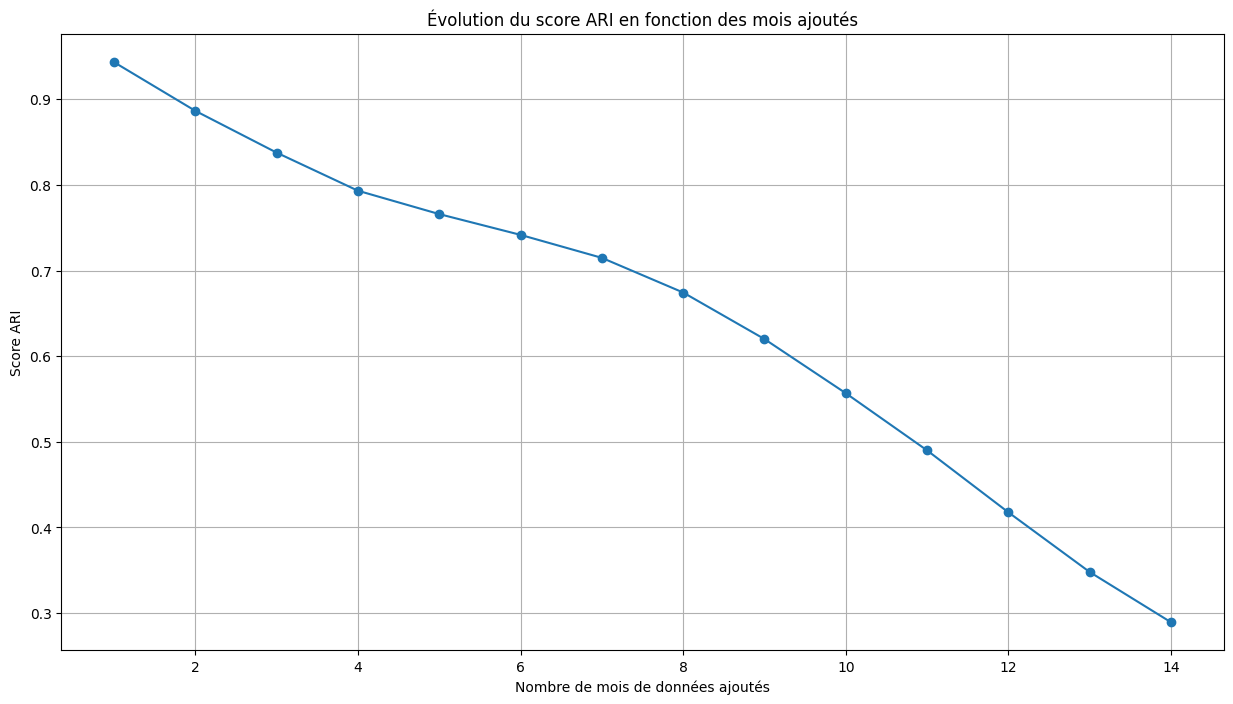

In [ ]:
# Affichage graphique des scores ARI
months_added = range(1, 15)
plt.figure(figsize = (15, 8))
plt.plot(months_added, scores_ARI, marker='o')
plt.xlabel('Nombre de mois de données ajoutés')
plt.ylabel('Score ARI')
plt.title('Évolution du score ARI en fonction des mois ajoutés')
plt.grid(True)
plt.show()